In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## FIFA 21 Player Stats Dataset

In [3]:
data = pd.read_csv(r'C:\Users\Usman\Desktop\Portofolio\Datasets\Fifa21\players_21.csv')

data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos 

## Task1: Initial Data Exploration & Cleaning

#### Examining the Dataset:

In [53]:
# Check for missing values across all columns.
data.isnull().sum().count()


106

In [5]:
data['nation_position'].isnull()

0        False
1        False
2        False
3         True
4         True
         ...  
18939     True
18940     True
18941     True
18942     True
18943     True
Name: nation_position, Length: 18944, dtype: bool

In [6]:
data['sofifa_id'].dtype

dtype('int64')

In [7]:
filterbyid = data.loc[18943]
print(filterbyid)

sofifa_id                                               257936
player_url    https://sofifa.com/player/257936/yue-song/210002
short_name                                            Song Yue
long_name                                             Yue Song
age                                                         28
                                    ...                       
lb                                                        47+0
lcb                                                       46+1
cb                                                        46+1
rcb                                                       46+1
rb                                                        47+0
Name: 18943, Length: 106, dtype: object


In [8]:
# Identify any columns that are not relevant for our analysis (e.g., URLs or unrelated data).
# sofifa_id column, as it not used for analysis and isnt required.
# dob, since we have age and we can just use that.

df = data.drop(['sofifa_id', 'dob', 'player_url'], axis=1)
df.head(5)

,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,J. Oblak,Jan Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,R. Lewandowski,Robert Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,Neymar Jr,Neymar da Silva Santos Júnior,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,2017-08-03,2022.0,NaN,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,87,

### 2. Name Issues:

In [9]:
df['long_name']

0             Lionel Andrés Messi Cuccittini
1        Cristiano Ronaldo dos Santos Aveiro
2                                  Jan Oblak
3                         Robert Lewandowski
4              Neymar da Silva Santos Júnior
                        ...                 
18939                           Kevin Angulo
18940                         Mengxuan Zhang
18941                                    王政豪
18942                            Zitong Chen
18943                               Yue Song
Name: long_name, Length: 18944, dtype: object

In [10]:
df['short_name']

0                 L. Messi
1        Cristiano Ronaldo
2                 J. Oblak
3           R. Lewandowski
4                Neymar Jr
               ...        
18939            K. Angulo
18940       Zhang Mengxuan
18941        Wang Zhenghao
18942          Chen Zitong
18943             Song Yue
Name: short_name, Length: 18944, dtype: object

In [11]:
# Some of the names are in different languages

### 3. Data Types:

In [12]:
# pd.set_option('display.max_rows', None)
df.dtypes

short_name    object
long_name     object
age            int64
height_cm      int64
weight_kg      int64
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 103, dtype: object

## Task 2: Handling Missing Values & Fixing Name Issues


#### Handling Missing Values:

In [13]:
# Identify Columns with Missing Data:
df.isnull().sum()


short_name    0
long_name     0
age           0
height_cm     0
weight_kg     0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 103, dtype: int64

In [14]:
def print_null_colname(df):
    for col_name in df.columns:
        null_counter = df[col_name].isnull().sum()
        if df[col_name].isnull().sum() > 0:
            print(f'Column Name: {col_name}, Missing Values: {null_counter}')

print_null_colname(df)

Column Name: club_name, Missing Values: 225
Column Name: league_name, Missing Values: 225
Column Name: league_rank, Missing Values: 225
Column Name: release_clause_eur, Missing Values: 995
Column Name: player_tags, Missing Values: 17536
Column Name: team_position, Missing Values: 225
Column Name: team_jersey_number, Missing Values: 225
Column Name: loaned_from, Missing Values: 18186
Column Name: joined, Missing Values: 983
Column Name: contract_valid_until, Missing Values: 225
Column Name: nation_position, Missing Values: 17817
Column Name: nation_jersey_number, Missing Values: 17817
Column Name: pace, Missing Values: 2083
Column Name: shooting, Missing Values: 2083
Column Name: passing, Missing Values: 2083
Column Name: dribbling, Missing Values: 2083
Column Name: defending, Missing Values: 2083
Column Name: physic, Missing Values: 2083
Column Name: gk_diving, Missing Values: 16861
Column Name: gk_handling, Missing Values: 16861
Column Name: gk_kicking, Missing Values: 16861
Column Na

In [15]:
df.shape

(18944, 103)

In [16]:
# To drop defending_marking I had to ensure all the stats for this column were missing in the follwoing results
unique_positions = df.drop_duplicates(subset=['player_positions'])

unique_positions.head(15)

# Has NaN values for almost all positions, but this stat matters for Defenders the most so lets check in the next cell.

,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,J. Oblak,Jan Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,R. Lewandowski,Robert Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,Neymar Jr,Neymar da Silva Santos Júnior,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,2017-08-03,2022.0,NaN,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,87,

In [17]:
# Checking if I should be dropping defending_marking column
cd_only = df[df['player_positions']=='CB']
cd_only.head()

,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
8,V. van Dijk,Virgil van Dijk,28,193,92,Netherlands,Liverpool,English Premier League,1.0,90,91,75500000,210000,CB,Right,3,3,2,Medium/Medium,PLAYER_BODY_TYPE_314,Yes,145300000.0,"#Tackling, #Tactician, #Strength, #Complete De...",LCB,4.0,NaN,2018-01-01,2023.0,LCB,4.0,76.0,60.0,71.0,71.0,91.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Leadership, Long Passer (AI), Po...",53,52,87,79,45,70,60,70,86,77,72,79,61,89,53,81,90,75,92,64,83,90,47,65,62,90,NaN,93,86,13,10,13,11,11,70+3,70+3,70+3,68+0,69+0,69+0,69+0,68+0,70+3,70+3,70+3,70+3,76+3,76+3,76+3,70+3,80+3,85+3,85+3,85+3,80+3,82+3,89+2,89+2,89+2,82+3
14,Sergio Ramos,Sergio Ramos García,34,184,82,Spain,Real Madrid,Spain Primera Division,1.0,89,89,24500000,300000,CB,Right,4,3,3,High/Medium,PLAYER_BODY_TYPE_352,Yes,50200000.0,"#Aerial Threat, #Tackling, #Tactician, #Comple...",LCB,4.0,NaN,2005-08-01,2021.0,RCB,15.0,71.0,70.0,76.0,73.0,88.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,"Dives Into Tackles (AI), Leadership, Long Pass...",66,65,92,82,69,65,74,76,83,83,72,70,78,92,66,79,93,81,85,64,90,88,73,71,92,88,NaN,88,90,11,8,9,7,11,77+3,77+3,77+3,73+0,75+0,75+0,75+0,73+0,75+3,75+3,75+3,75+3,79+3,79+3,79+3,75+3,81+3,85+3,85+3,85+3,81+3,83+3,88+1,88+1,88+1,83+3
26,K. Koulibaly,Kalidou Koulibaly,29,187,89,Senegal,Napoli,Italian Serie A,1.0,88,88,50000000,140000,CB,Right,3,3,2,Medium/High,PLAYER_BODY_TYPE_336,Yes,85000000.0,"#Tackling, #Tactician, #Strength, #Complete De...",LCB,26.0,NaN,2014-07-01,2023.0,NaN,NaN,75.0,28.0,55.0,68.0,89.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,Power Header,30,22,84,74,14,69,28,28,63,74,73,77,52,85,41,55,82,70,94,15,87,87,35,52,33,82,NaN,89,87,7,11,7,13,5,57+3,57+3,57+3,57+0,59+0,59+0,59+0,57+0,60+3,60+3,60+3,61+3,66+3,66+3,66+3,61+3,75+3,80+3,80+3,80+3,75+3,78+3,87+1,87+1,87+1,78+3
31,A. Laporte,Aymeric Laporte,26,189,85,France,Manchester City,English Premier League,1.0,87,90,56000000,200000,CB,Left,2,3,2,Medium/Medium,PLAYER_BODY_TYPE_319,Yes,107800000.0,"#Tackling, #Tactician",LCB,14.0,NaN,2018-01-30,2024.0,NaN,NaN,63.0,50.0,72.0,68.0,88.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,Long Passer (AI),58,45,86,82,40,63,61,69,80,78,60,65,59,87,60,68,76,72,85,47,81,87,54,65,44,85,NaN,89,88,10,11,5,14,5,66+2,66+2,66+2,65+0,66+0,66+0,66+0,65+0,68+2,68+2,68+2,68+2,74+2,74+2,74+2,68+2,78+2,83+2,83+2,83+2,78+2,80+2,86+2,86+2,86+2,80+2
35,G. Chiellini,Giorgio Chiellini,35,187,85,Italy,Juventus,Italian Serie A,1.0,87,87,15500000,94000,CB,Left,4,3,2,Medium/High,Normal,Yes,25600000.0,"#Tackling, #Tactician, #Strength, #Complete De...",LCB,3.0,NaN,2005-07-01,2021.0,LCB,16.0,66.0,46.0,58.0,60.0,90.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Injury Prone, Dives Into Tackle...",54,33,83,65,45,59,60,31,65,61,60,70,57,82,57,78,87,54,87,49,90,88,28,50,50,84,NaN,90,88

In [18]:
# Drop rows with missing values
# player_tags, loaned_from, nation_positon, nation_jersey_number, defending_marking is data not required for analysis.
df = df.drop(['player_tags', 'loaned_from', 'nation_position', 'nation_jersey_number', 'defending_marking'], axis=1)
df.head(10)


,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,CAM,10.0,2004-07-01,2021.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,LS,7.0,2018-07-10,2022.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,J. Oblak,Jan Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,R. Lewandowski,Robert Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,ST,9.0,2014-07-01,2023.0,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,Neymar Jr,Neymar da Silva Santos Júnior,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,LW,10.0,2017-08-03,2022.0,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
5,K. De Bruyne,Kevin De Bruyne,29,181,70,Belgium,Manchester City,English Premier League,1.0,91,91,87000000,370000,"CAM, CM",Right,4,5,4,High/

In [19]:
df[df['long_name']=='Gareth Bale']

,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [20]:
# Reason to make League ranks 0, not dropping league ranks as we may need this data to link highest rated players to league stats
df['league_rank'].unique()

array([ 1., nan,  2.,  3.,  4.])

In [21]:
# Reasoning to impute league rank for free agents to 0
df.loc[(df['league_rank'].isnull()) & (df['club_name']=='Free Agent')]

,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [22]:
# Investigating club_name, league_name, league_rank, release_clause_eur, contract_valid_until, team_position
# I can drop contract_valid_until I dont need that for player stats or their personal stats
# Free Agents
df[(df['release_clause_eur'].isnull()) \
   & (df['club_name'].isnull()) \
   & (df['league_name'].isnull())\
   & (df['league_rank'].isnull()) ]

# Leangue Rank has to go 0 for Free Agents

,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
359,Juiano Mestres,Juan Everton Mestres de Mesquita,24,181,82,Brazil,NaN,NaN,NaN,81,81,0,0,"CB, CDM",Right,1,3,2,High/Medium,Normal,No,NaN,NaN,NaN,NaN,NaN,71.0,61.0,57.0,62.0,82.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,Power Header,40,56,83,67,63,60,72,58,58,64,68,74,61,78,63,74,91,76,79,61,86,82,58,50,62,70,85,84,18,12,14,11,18,67+2,67+2,67+2,61+0,64+0,64+0,64+0,61+0,62+2,62+2,62+2,62+2,65+2,65+2,65+2,62+2,71+2,74+2,74+2,74+2,71+2,74+2,81+0,81+0,81+0,74+2
363,Welington Dano,Welington Kauê Dano Nascimento,20,178,69,Brazil,NaN,NaN,NaN,81,81,0,0,"LB, LM",Left,1,4,4,Medium/Medium,Lean,No,NaN,NaN,NaN,NaN,NaN,79.0,54.0,76.0,78.0,75.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,51,69,78,47,77,83,52,71,78,78,80,83,80,81,55,71,89,68,53,69,77,72,75,61,82,77,81,16,15,15,7,7,67+2,67+2,67+2,74+0,72+0,72+0,72+0,74+0,74+2,74+2,74+2,76+2,75+2,75+2,75+2,76+2,79+2,76+2,76+2,76+2,79+2,79+2,74+2,74+2,74+2,79+2
494,J. Serendero,Jorge Ezequiel Serendero,32,190,85,Uruguay,NaN,NaN,NaN,80,80,0,0,GK,Right,1,2,1,Medium/Medium,Normal,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,81.0,77.0,77.0,42.0,80.0,Team Player,10,8,11,18,8,9,9,18,16,21,41,42,34,78,41,58,67,29,79,7,34,23,27,71,14,67,17,13,78,81,77,80,77,30+2,30+2,30+2,27+0,31+0,31+0,31+0,27+0,31+2,31+2,31+2,28+2,30+2,30+2,30+2,28+2,25+2,28+2,28+2,28+2,25+2,25+2,29+2,29+2,29+2,25+2
495,J. Frendado,Jaime Nicolás Frendado,36,181,82,Uruguay,NaN,NaN,NaN,80,80,0,0,"CB, CDM",Right,1,3,2,High/Medium,Normal,No,NaN,NaN,NaN,NaN,NaN,71.0,61.0,57.0,62.0,82.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,Power Header,40,56,80,67,63,60,72,58,58,64,67,74,61,76,63,74,91,60,77,61,86,82,58,50,62,70,82,82,14,15,15,17,19,66+2,66+2,66+2,61+0,63+0,63+0,63+0,61+0,62+2,62+2,62+2,61+2,64+2,64+2,64+2,61+2,69+2,73+2,73+2,73+2,69+2,72+2,80+0,80+0,80+0,72+2
496,M. Baldona,Matías David Baldona,36,177,75,Uruguay,NaN,NaN,NaN,80,80,0,0,"CDM, CM",Right,1,4,3,High/High,Stocky,No,NaN,NaN,NaN,NaN,NaN,68.0,62.0,74.0,76.0,78.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,58,59,78,58,75,48,73,75,77,69,68,78,78,77,72,67,89,71,64,81,79,54,73,61,68,81,77,9,9,14,15,8,66+2,66+2,66+2,71+0,70+0,70+0,70+0,71+0,72+2,72+2,72+2,73+2,75+2,75+2,75+2,73+2,78+2,79+1,79+1,79+1,78+2,77+2,76+2,76+2,76+2,77+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16612,R. Jayaraman,Randhir Jayaraman,35,180,82,India,NaN,NaN,NaN,58,58,0,0,ST,Right,1,2,2,Medium/Low,Stocky,No,NaN,NaN,NaN,NaN,NaN,60.0,59.0,52.0,53.0,31.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,60,64,55,54,52,51,59,43,50,57,62,57,50,68,60,79

In [23]:
# Reason to impute player_traits
df.loc[df['player_traits'].isnull()]

# This column wont help in the analysis, hence dropping it out

,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
27,N. Kanté,N'Golo Kanté,29,168,70,France,Chelsea,English Premier League,1.0,88,88,51000000,190000,"CDM, CM",Right,3,3,2,Medium/High,PLAYER_BODY_TYPE_283,Yes,96900000.0,RDM,7.0,2016-07-16,2023.0,77.0,66.0,76.0,81.0,86.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68,65,54,85,56,79,49,49,79,80,79,76,82,91,92,71,77,96,72,65,90,91,72,79,54,85,90,85,15,12,10,7,10,72+3,72+3,72+3,77+0,77+0,77+0,77+0,77+0,79+3,79+3,79+3,79+3,82+3,82+3,82+3,79+3,85+3,86+2,86+2,86+2,85+3,84+3,83+3,83+3,83+3,84+3
60,Carvajal,Daniel Carvajal Ramos,28,173,73,Spain,Real Madrid,Spain Primera Division,1.0,86,86,38000000,230000,RB,Right,3,3,3,High/High,PLAYER_BODY_TYPE_355,Yes,77900000.0,RB,2.0,2013-07-05,2022.0,80.0,54.0,78.0,80.0,82.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,51,72,83,49,78,76,47,74,84,79,80,79,84,81,68,77,89,74,47,84,83,75,74,45,82,83,85,13,13,15,9,15,71+3,71+3,71+3,76+0,75+0,75+0,75+0,76+0,76+3,76+3,76+3,79+3,78+3,78+3,78+3,79+3,84+2,82+3,82+3,82+3,84+2,83+3,81+3,81+3,81+3,83+3
71,M. Škriniar,Milan Škriniar,25,188,80,Slovakia,Inter,Italian Serie A,1.0,85,89,44500000,130000,CB,Right,1,4,2,Medium/High,PLAYER_BODY_TYPE_303,Yes,76800000.0,LCB,37.0,2017-07-07,2023.0,69.0,41.0,59.0,66.0,87.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,42,82,73,40,67,34,30,69,69,70,68,48,83,51,50,78,73,84,30,86,86,30,57,56,81,87,83,10,13,12,8,12,59+2,59+2,59+2,58+0,59+0,59+0,59+0,58+0,61+2,61+2,61+2,62+2,67+2,67+2,67+2,62+2,74+2,79+2,79+2,79+2,74+2,76+2,84+2,84+2,84+2,76+2
74,Rodri,Rodrigo Hernández Cascante,24,191,82,Spain,Manchester City,English Premier League,1.0,85,88,44000000,145000,"CDM, CM",Right,2,4,3,Medium/High,Normal,Yes,84700000.0,CDM,16.0,2019-07-04,2024.0,65.0,68.0,77.0,77.0,82.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,64,75,85,59,76,65,54,82,82,66,65,68,82,69,74,69,84,79,76,76,83,75,82,46,85,84,78,10,10,7,14,8,74+2,74+2,74+2,74+0,76+0,76+0,76+0,74+0,78+2,78+2,78+2,76+2,81+2,81+2,81+2,76+2,78+2,82+2,82+2,82+2,78+2,78+2,80+2,80+2,80+2,78+2
89,P. Gulácsi,Péter Gulácsi,30,191,86,Hungary,RB Leipzig,German 1. Bundesliga,1.0,85,85,26000000,65000,GK,Right,2,2,1,Medium/Medium,Normal,Yes,44200000.0,GK,1.0,2015-07-01,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,84.0,85.0,82.0,86.0,43.0,84.0,NaN,16,10,23,35,10,19,18,11,31,25,42,44,41,82,42,62,67,35,74,12,34,23,11,42,24,45,16,20,84,85,82,84,86,32+2,32+2,32+2,29+0,31+0,31+0,31+0,29+0,31+2,31+2,31+2,31+2,32+2,32+2,32+2,31+2,31+2,33+2,33+2,33+2,31+2,30+2,33+2,33+2,33+2,30+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,K. Angulo,Kevin Angulo,2

In [24]:
# Reasoning to impute Shooting
shooting_str = df['shooting'].astype(str)

gk_shooting = pd.DataFrame({
    'player_positions': df['player_positions'],
    'shooting': shooting_str
})

gk_shooting = gk_shooting[gk_shooting['player_positions']=='GK']

gk_shooting.head()

,player_positions,shooting
2,GK,nan
7,GK,nan
9,GK,nan
12,GK,nan
16,GK,nan


In [25]:
# Reason to make Goalkeeper Dribbling and Pace to 0
dribbling_str = df['dribbling'].astype(str)

gk_dribbling = pd.DataFrame({
    'player_positions': df['player_positions'],
    'dribbling': dribbling_str
})

gk_dribbling = gk_dribbling[gk_dribbling['player_positions']=='GK']

gk_dribbling.head()

,player_positions,dribbling
2,GK,nan
7,GK,nan
9,GK,nan
12,GK,nan
16,GK,nan


In [26]:
# Reason to impute or remove gk_positioning
df.loc[df['player_positions']!='GK',['gk_positioning']].isnull()

,gk_positioning
0,True
1,True
3,True
4,True
5,True
...,...
18939,True
18940,True
18941,True
18942,True


In [27]:
# Impute values
# Imputing gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_speed
df[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed']] = df[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed']].fillna(0)

# Imputing pace for Goalkeepers to zero as it is not required for GKs
df['pace'] = df['pace'].fillna(0)

# Imputing dribbling for Goalkeepers to zero as it is not required for GKs
df['dribbling'] = df['dribbling'].fillna(0)

# Imputing shooting for goalkeepers to zero as it is not required for GKs
df.loc[df['player_positions']=='GK', 'shooting'] = df.loc[df['player_positions']=='GK', 'shooting'].fillna(0)

# Imputing Goalkeepers' passing, defending, physic
df.loc[df['player_positions']=='GK', ['passing', 'defending', 'physic']] = df.loc[df['player_positions']=='GK', ['passing', 'defending', 'physic']].fillna(0)

# Dropping player_traits
df = df.drop('player_traits', axis=1)

# Imputing the gk_positioning stat for players who are not GKs
df.loc[df['player_positions']!='GK',['gk_positioning']] = df.loc[df['player_positions']!='GK',['gk_positioning']].fillna(0)

# Dropping team_jersey_number column
df = df.drop('team_jersey_number', axis=1)

# Imputing Players without release clause, club name and league name to Free Agent
df.loc[(df['release_clause_eur'].isnull()) & (df['club_name'].isnull()) & (df['league_name'].isnull()), ['release_clause_eur', 'club_name', 'league_name']] = df.loc[(df['release_clause_eur'].isnull()) & (df['club_name'].isnull()) & (df['league_name'].isnull()), ['release_clause_eur', 'club_name', 'league_name']].fillna('Free Agent')

# Dropping the contract_valid_until column
df = df.drop('contract_valid_until', axis=1)

# Imputing league rank to zero for Fre Agents
df.loc[(df['league_rank'].isnull()) & (df['club_name']=='Free Agent'),['league_rank']] = df.loc[(df['league_rank'].isnull()) & (df['club_name']=='Free Agent')].fillna(0)

# Imputing team_position ranking for Free Agents, we can further make it better down the pre=processing
df.loc[df['club_name']=='Free Agent',['team_position']] = df.loc[df['club_name']=='Free Agent',['team_position']].fillna('Free Agent')

# Dropping release_clause_eur, because it is not required for Player stat analysis
df = df.drop('release_clause_eur', axis=1)

# This column is a bit tricky, but I am using a placeholder only because I wanna do [1800-01-01] time series later on and will sort it out there
df.loc[(df['joined'].isnull())&(df['club_name']=='Free Agent')] =df.loc[(df['joined'].isnull())&(df['club_name']=='Free Agent')].fillna('1800-01-01')

# This column defines that the these columns are on Loan from their previous clubs 1900-01-01
df.loc[(df['joined'].isnull())&(df['club_name'].notna()),['club_name', 'joined']] = df.loc[(df['joined'].isnull())&(df['club_name'].notna()),['club_name', 'joined']].fillna('1900-01-01')

In [28]:
df.columns

Index(['short_name', 'long_name', 'age', 'height_cm', 'weight_kg',
       'nationality', 'club_name', 'league_name', 'league_rank', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face', 'team_position',
       'joined', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_l

In [29]:
df.head()

,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,team_position,joined,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,CAM,2004-07-01,85.0,92.0,91.0,95.0,38.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,LS,2018-07-10,89.0,93.0,81.0,89.0,35.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,J. Oblak,Jan Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,GK,2014-07-16,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,90.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,R. Lewandowski,Robert Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,ST,2014-07-01,78.0,91.0,78.0,85.0,43.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,Neymar Jr,Neymar da Silva Santos Júnior,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,LW,2017-08-03,91.0,85.0,86.0,94.0,36.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


## Task 3: Initial Data Exploration and Key Metric Analysis

In [30]:
# Analyzing Player Distributions and Summary Statistics:


In [31]:
df_main = df.copy()

In [32]:
df_main.head()

,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,team_position,joined,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,CAM,2004-07-01,85.0,92.0,91.0,95.0,38.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,LS,2018-07-10,89.0,93.0,81.0,89.0,35.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,J. Oblak,Jan Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,GK,2014-07-16,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,90.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,R. Lewandowski,Robert Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,ST,2014-07-01,78.0,91.0,78.0,85.0,43.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,Neymar Jr,Neymar da Silva Santos Júnior,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,LW,2017-08-03,91.0,85.0,86.0,94.0,36.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [33]:
df_main.describe()

,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.00000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,25.225823,181.190773,75.016892,1.340952,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,2.936603,2.363017,60.227618,46.527027,50.85663,55.588102,45.673775,57.371358,7.165171,6.915013,6.786423,7.268951,4.090741,6.946104,49.612859,45.796083,51.874578,58.705448,42.669552,55.546400,47.187289,42.356155,52.653030,58.482791,64.285103,64.326489,63.333193,61.609428,63.918549,57.752798,64.590530,62.596020,64.742927,46.758763,55.488862,46.250000,50.255807,53.828231,48.050412,57.978674,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,4.697354,6.825672,7.057140,0.749484,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,0.667132,0.766469,23.570006,21.016229,20.33423,21.717156,22.299431,22.163045,20.545779,19.823863,19.471174,20.856160,12.168842,19.965853,18.153057,19.592269,17.321709,14.572383,17.661569,18.787112,18.231204,17.239561,15.205281,16.598040,14.926452,14.689422,14.625189,9.112954,14.075215,13.330631,11.888479,15.878793,12.519775,19.305319,17.203045,20.738106,19.443738,13.724072,15.671721,12.118390,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,16.000000,155.000000,50.000000,0.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,5.000000,7.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,13.000000,12.000000,14.000000,24.000000,12.000000,18.000000,15.000000,12.000000,16.000000,4.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,2.000000,57.000000,35.000000,47.00000,53.000000,30.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,35.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,55.000000,57.000000,32.000000,44.000000,25.000000,40.000000,45.000000,38.750000,50.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,181.000000,75.000000,1.000000,66.000000,71.000000,6.500000e+05,3000.000000,1.000000,3.000000,2.000000,67.000000,52.000000,56.00000,62.000000,52.000000,64.000000,0.00000

##### the .describe() explained:
Let's take the age column:
1) All of these columns has the same row count of 18944
2) Mean Age is 25.23
3) STD of Age measures the spread of the data from mean.
4) Min shows the minimum value of Age in the column.
5) 25% of the players fall below Age of 21, 50% below age of 25 and 75% below age of 29.
6) Max Age in this column is 53.

The describe stats tells us about the statistical information about the data, the data can be interperated for alot of columns in the same way, but for columns that can't be descirbed has some different explaination, for example, the league_rank columns ranks the league in 4 numbers which makes it categorical data.

In [34]:
df_main['league_rank'].unique()

array([1., 0., 2., 3., 4.])

#### 1. Analyzing Player Distributions and Summary Statistics:

In [35]:
# Create histograms or box plots for overall, potential, age, value_eur, and wage_eur to explore their distribution.

In [36]:
histplt = df_main[['overall','potential', 'age', 'value_eur', 'wage_eur' ]]
colors = ['red', 'blue', 'gray', 'black', 'orange']


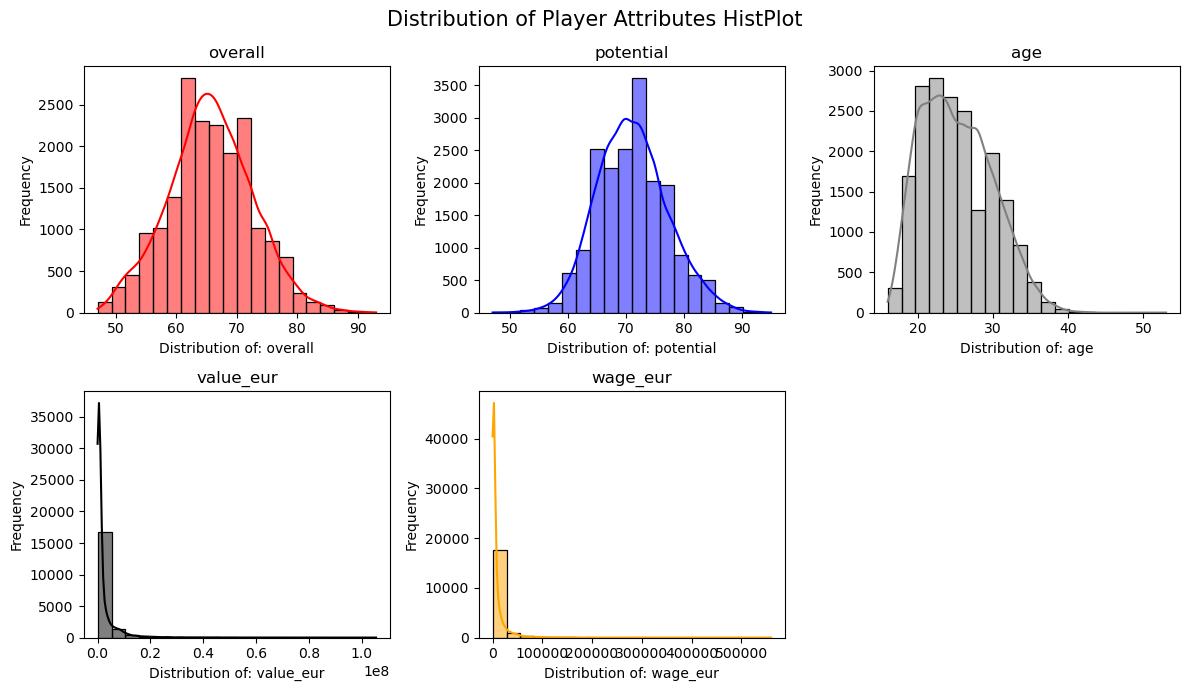

In [37]:
plt.figure(figsize=(12,7))

for idx, (column, color) in enumerate(zip(histplt.columns, colors), start=1):
    plt.subplot(2,3,idx)
    sns.histplot(histplt[column], bins=20, color=color, kde=True)
    plt.title(column)
    plt.ylabel('Frequency')
    plt.xlabel(f'Distribution of: {column}')

plt.suptitle('Distribution of Player Attributes HistPlot', size=15, horizontalalignment='center' )
plt.tight_layout()
plt.show()

##### Overall:
1) This shows it is somewhat of a normal distribution, most of the player overalls are between 65-70.
2) From 80-90, these are high rated players with rare occurences compared to the latter.

##### Potential:
1) This shows the potential also has a normal distribution, similar to overall.

##### Age:
1) KDE indicated a right skewed graph, where most of the players are aged from 20-29.

##### Value in EUR:
1) Value of a player is directly related to the high potential and overall of the players. It shows us the trend that,
the higher rated player has a higher value in europe.
2) It is also assymetrical and right skewed.

##### Wage in EUR:
1) Highest Rated players are paid more than the normal player.
2) Lower rated players are paid way less than a Million Euro in a year.
3) Also right skewed.

---------------------------------------------  

<b>We are also going to plot a Box plot now, just to further research on this.</b>

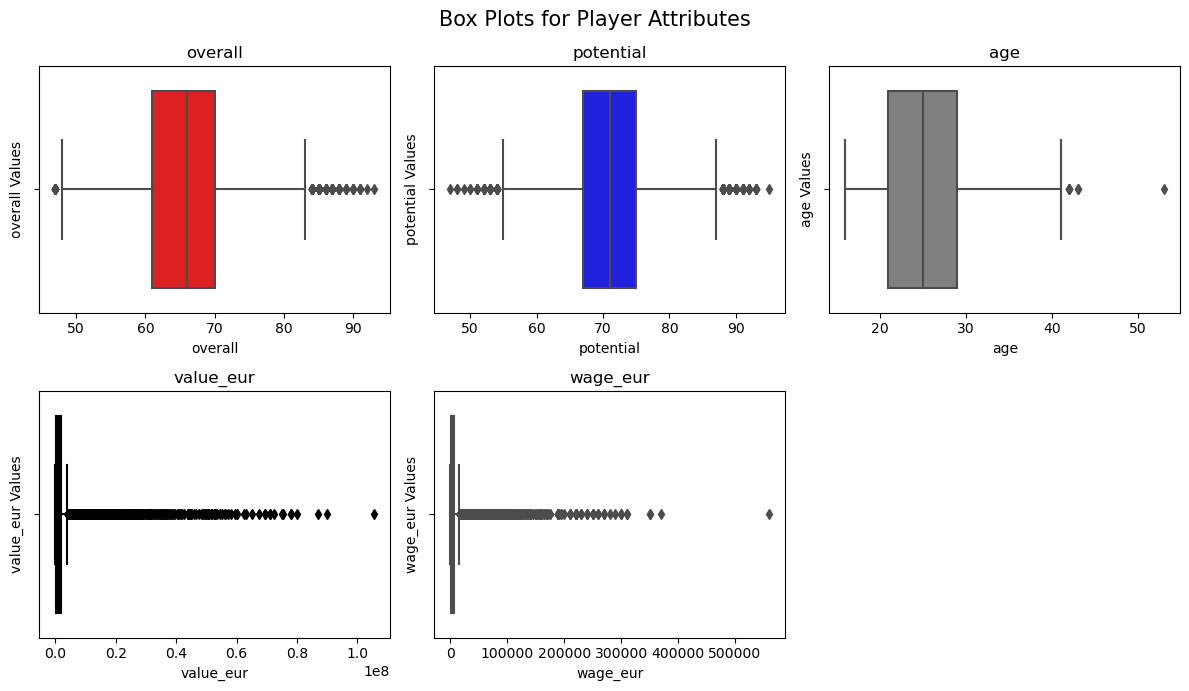

In [38]:
colors = ['red', 'blue', 'gray', 'black', 'orange']

plt.figure(figsize=(12,7))

for index, (column,color) in enumerate(zip(histplt.columns,colors), start=1):
    plt.subplot(2,3,index)
    sns.boxplot(x=histplt[column], color=color)
    plt.title(column)
    plt.xlabel(f'{column}')
    plt.ylabel(f'{column} Values')
    
plt.suptitle('Box Plots for Player Attributes', size=15)
plt.tight_layout()
plt.show()

#### Whisker Plot

##### Overall:
1) The whisker plot shows, that 25% of the players fall below 60 overall.
2) 50% of the players fall between 60 and 70.
3) 75% of the players fall below 70 overall.
4) Dots at the ends of the whisker are outliers, these are players with overall above 80.
5) The IQR suggests, most players fall between 60-75.

##### These conditions concludes the analysis of these columns with histogram and whisker plots.

#### 2. Position-Based Performance Analysis:

In [39]:
# Compare how players in different positions (attackers, midfielders, defenders, goalkeepers) perform across key metrics.

In [40]:
df_filtered = df_main[df_main['team_position']!='Free Agent'] 

df_pba = df_filtered.groupby('team_position')[['overall', 'potential', 'pace', 'dribbling', 'defending', 'physic', 'passing']].mean()

df_pba.head()

,overall,potential,pace,dribbling,defending,physic,passing
team_position,,,,,,,
CAM,70.087413,73.297203,70.328671,71.923077,45.286713,62.020979,68.164336
CB,68.468750,70.914062,54.257812,51.687500,68.679688,73.390625,50.695312
CDM,69.839779,73.171271,61.060773,65.403315,66.524862,72.171271,64.767956
CF,72.846154,74.461538,70.076923,74.153846,44.307692,65.461538,68.692308
CM,67.236842,69.907895,63.223684,65.894737,61.013158,68.394737,64.776316


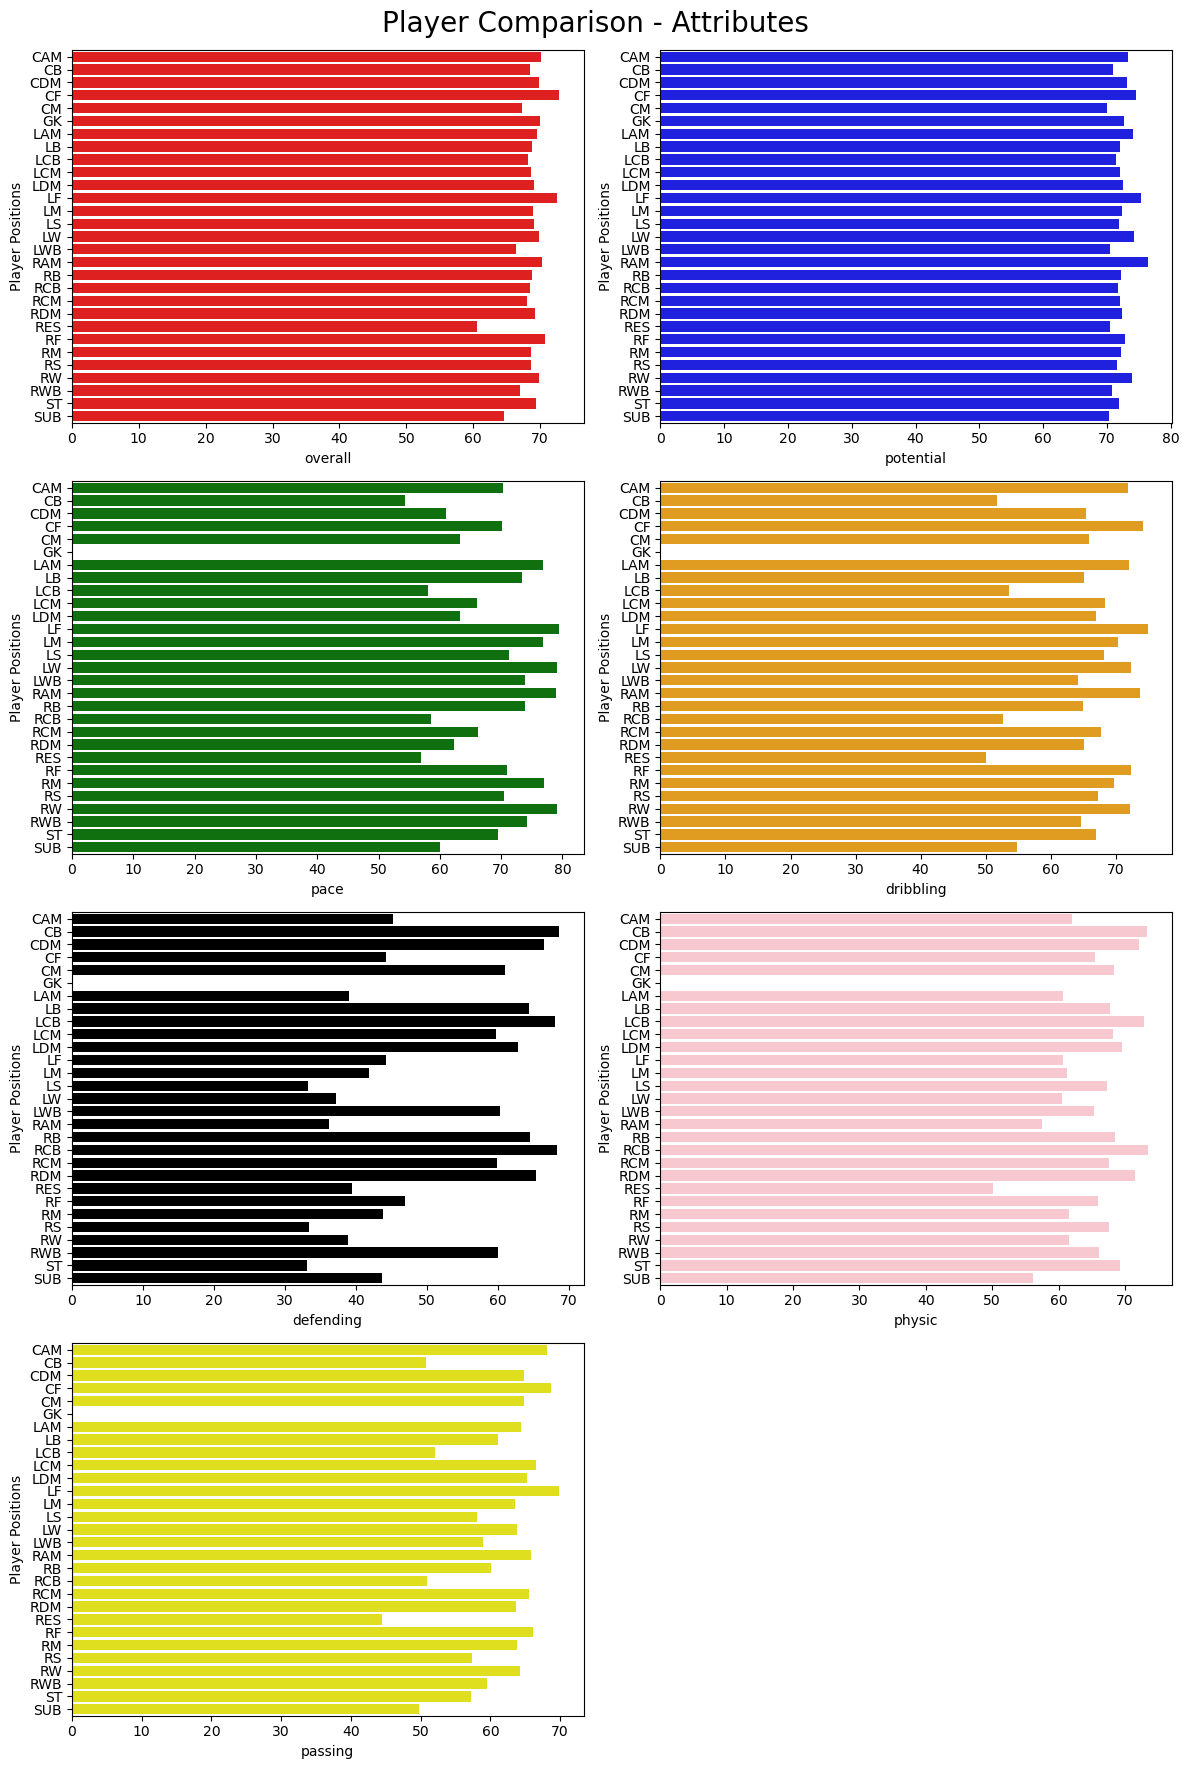

In [41]:
colors = ['red', 'blue', 'green', 'orange', 'black', 'pink', 'yellow']
plt.figure(figsize=(12,18))

for index, (column, color) in enumerate(zip(df_pba.columns, colors), start=1):
    plt.subplot(4,2,index)
    sns.barplot(x=df_pba[column],y=df_pba.index, color=color)
    plt.xlabel(column)
    plt.ylabel('Player Positions')

plt.suptitle('Player Comparison - Attributes', size=20)
plt.tight_layout(rect=[0,0,1,0.99])
plt.show()

#### Bar Chart Plot
1) The barchart clearly shows that Attackers have higher average attributes in general.
2) As goalkeepers have nothing to with the attributes listed above, they are rated zero on all attributes, but rated quite high in overall attribute.
3) Forwards, Midfielders and Wingbacks has higher pace and dribbling.
4) CDMs and CBs has similar stats, but CDM also has higher passing than CBs, settling the trend of Non-defensive players to be better passers with a few exceptions.

#### 3. Correlation Analysis Between Player Attributes:

In [42]:
# Objective: Identify which attributes correlate the most with overall rating and potential.

In [43]:
df_corr = df_main[['overall', 'potential', 'pace', 'dribbling', 'defending', 'physic', 'passing']]

df_corr.corr()

,overall,potential,pace,dribbling,defending,physic,passing
overall,1.000000,0.636366,0.133293,0.310754,0.271828,0.255674,0.364774
potential,0.636366,1.000000,0.170726,0.254767,0.160688,0.122659,0.253551
pace,0.133293,0.170726,1.000000,0.911898,0.559207,0.784241,0.851367
dribbling,0.310754,0.254767,0.911898,1.000000,0.604458,0.817609,0.964492
defending,0.271828,0.160688,0.559207,0.604458,1.000000,0.813976,0.690152
physic,0.255674,0.122659,0.784241,0.817609,0.813976,1.000000,0.832400
passing,0.364774,0.253551,0.851367,0.964492,0.690152,0.832400,1.000000


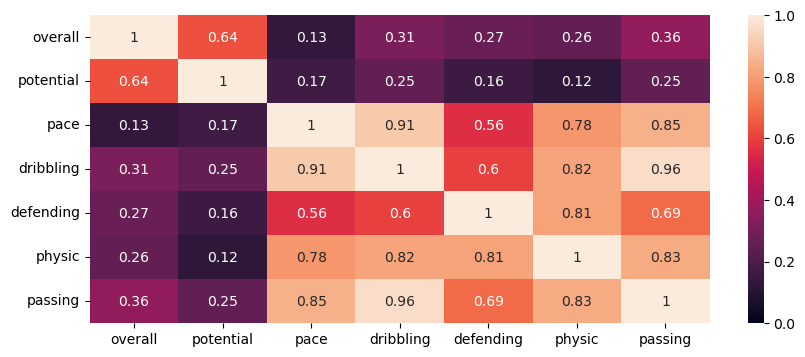

In [44]:
# This is okay, but lets plot the correlation matrix instead.

plt.figure(figsize=(10,4))
sns.heatmap(df_corr.corr(), annot=True, vmin=0, vmax=1)
plt.show()

#### Heat Map Correlation
1) Correlation between Potential and Overall 0.64, which suggests Players with high potential also tend to have high overall.
2) Pace and Correlation has a correlation of 0.91, which suggests players with high dribbling also have high pace, with bar chart analysis, we know Wing backs and Attackers tend to have high pace and dribbling attributes.
3) Dribbling has a high correlation with players with high Physical and Passing attributes this suggests, Attackers and Midfielders have high attributes in this relationship.
4) Player who are defenders have high defending and physical attributes, mostly CBs and CDMs known frombar chart analysis.
5) Player with high correaltion with Pace, dribbling and defending suggests they are mostly midfielders who are accomodated on different positions on the pitch and has to play multiple roles.
6) Passing has a high correlation with Pace, Dribbling and Physical attributes, and weak correlation with defending, this can suggest the best passers are players who are not Defenders.

#### 4. Top Players Analysis:

In [45]:
# Identify and analyze the top players in terms of overall rating, potential, and key attributes.

In [46]:
# Extracting the top 20 Players in Fifa 21
df_top_players = df_main.loc[(df_main['overall']> 85)&(df_main['team_position']!= "GK"), ['short_name', 'overall']]

# df_top_players.head(20)
df_top_players.sort_values(by='overall', axis=0, ascending=False).head(15)

,short_name,overall
0,L. Messi,93
1,Cristiano Ronaldo,92
3,R. Lewandowski,91
4,Neymar Jr,91
5,K. De Bruyne,91
10,S. Mané,90
11,M. Salah,90
8,V. van Dijk,90
6,K. Mbappé,90
13,S. Agüero,89


In [47]:
df_main.head()

,short_name,long_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,team_position,joined,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,CAM,2004-07-01,85.0,92.0,91.0,95.0,38.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,LS,2018-07-10,89.0,93.0,81.0,89.0,35.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,J. Oblak,Jan Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,GK,2014-07-16,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,90.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,R. Lewandowski,Robert Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,ST,2014-07-01,78.0,91.0,78.0,85.0,43.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,Neymar Jr,Neymar da Silva Santos Júnior,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,LW,2017-08-03,91.0,85.0,86.0,94.0,36.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


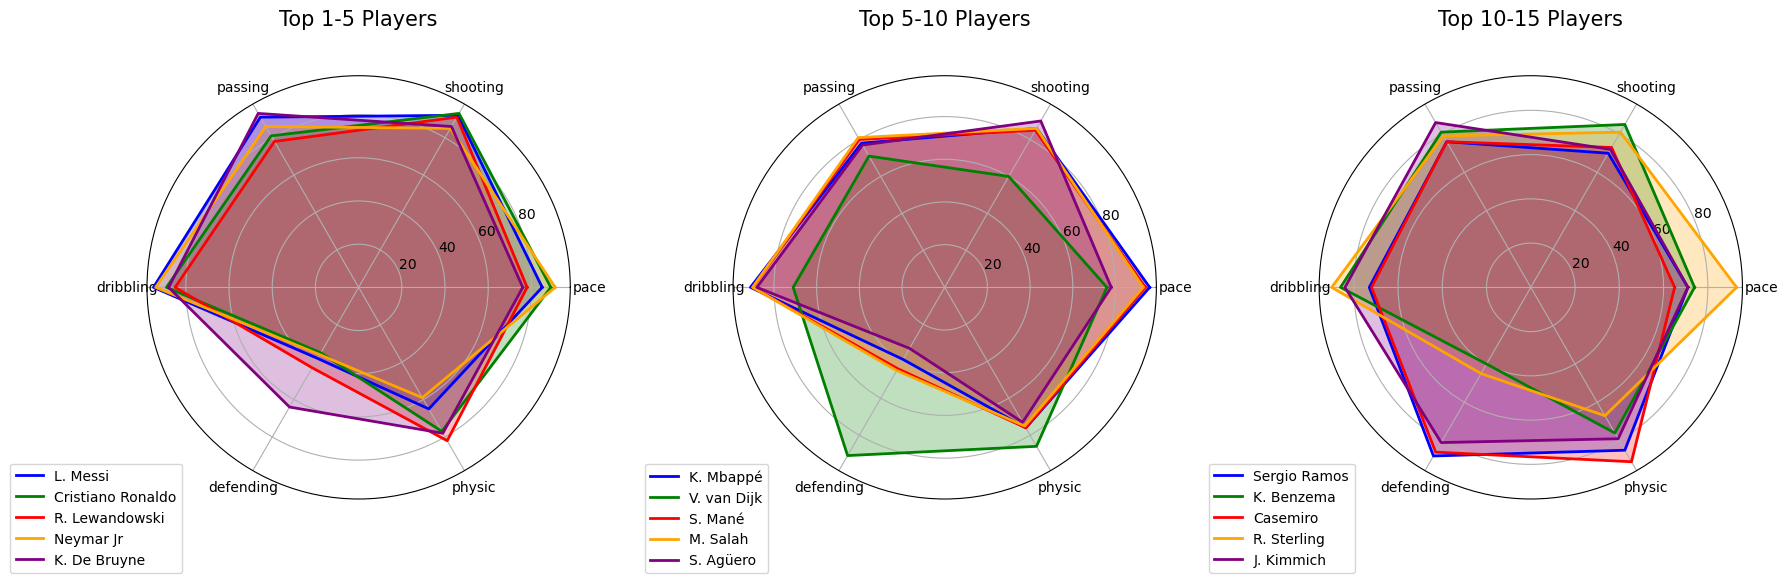

In [48]:
# Let's Analyze what attributes make them better
# I want to analyze this with a radar/spider chart but to save the clutter and the noise, I will divide top 15 players in
# 3 charts, so Top 1-5, Top 5-10, and Top 11-15.

# For these players I will be analyzing the speed, this list excludes Goal Keepers, as I only want to check for certain
# attributes, such as Dirbbling, Pace, Shooting etc. This analysis will give us an idea how stats contribute to overall.

# Splitting players into categories of top 5, 10 and 15.
top_five = df_main.loc[(df_main['overall']> 90)&(df_main['team_position']!= "GK"), ['short_name', 'overall']]
top_ten = df_main.loc[(df_main['overall']> 85)& (df_main['overall'] < 91) &(df_main['team_position']!= "GK"), ['short_name', 'overall']]
top_fifteen = df_main.loc[(df_main['overall']> 87) & (df_main['short_name'] != 'S. Agüero') & (df_main['overall'] < 90) & (df_main['team_position']!= "GK"), ['short_name', 'overall']]


# Radar chart function for multiple players
def create_radar_chart(ax, categories, players_data, title):
    
    # Preparing the angles for the chart
    num_vars = len(categories)
    # Compute angle of each axis
    # Start loop
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    # Close loop
    angles += angles[:1]  # Complete the circle

    # Creating the Plot
    # Plot each player's data
    for player_name, values, color in players_data:
        values += values[:1]  # Complete the loop
        # Plot the radar chart
        ax.fill(angles, values, color=color, alpha=0.25)
        ax.plot(angles, values, color=color, linewidth=2, label=player_name)

    # Labels and title
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(title, size=15, y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    
# ---------------------------------------------------------------------------------------------------

# Defining the categories for the radar chart
categories = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']


players_data_top_five = [
    ('L. Messi', df_main.loc[df_main['short_name'] == 'L. Messi', categories].values[0].tolist(), 'blue'),
    ('Cristiano Ronaldo', df_main.loc[df_main['short_name'] == 'Cristiano Ronaldo', categories].values[0].tolist(), 'green'),
    ('R. Lewandowski', df_main.loc[df_main['short_name'] == 'R. Lewandowski', categories].values[0].tolist(), 'red'),
    ('Neymar Jr', df_main.loc[df_main['short_name'] == 'Neymar Jr', categories].values[0].tolist(), 'orange'),
    ('K. De Bruyne', df_main.loc[df_main['short_name'] == 'K. De Bruyne', categories].values[0].tolist(), 'purple')
]

players_data_top_ten = [
    ('K. Mbappé', df_main.loc[df_main['short_name'] == 'K. Mbappé', categories].values[0].tolist(), 'blue'),
    ('V. van Dijk', df_main.loc[df_main['short_name'] == 'V. van Dijk', categories].values[0].tolist(), 'green'),
    ('S. Mané', df_main.loc[df_main['short_name'] == 'S. Mané', categories].values[0].tolist(), 'red'),
    ('M. Salah', df_main.loc[df_main['short_name'] == 'M. Salah', categories].values[0].tolist(), 'orange'),
    ('S. Agüero', df_main.loc[df_main['short_name'] == 'S. Agüero', categories].values[0].tolist(), 'purple')
]

players_data_top_fifteen = [
    ('Sergio Ramos', df_main.loc[df_main['short_name'] == 'Sergio Ramos', categories].values[0].tolist(), 'blue'),
    ('K. Benzema', df_main.loc[df_main['short_name'] == 'K. Benzema', categories].values[0].tolist(), 'green'),
    ('Casemiro', df_main.loc[df_main['short_name'] == 'Casemiro', categories].values[0].tolist(), 'red'),
    ('R. Sterling', df_main.loc[df_main['short_name'] == 'R. Sterling', categories].values[0].tolist(), 'orange'),
    ('J. Kimmich', df_main.loc[df_main['short_name'] == 'J. Kimmich', categories].values[0].tolist(), 'purple')
]

# Create side-by-side radar charts for Top 5, Top 10, and Top 15 players
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 7), subplot_kw=dict(polar=True))

# Left: Code 1 (Top 5 players)
create_radar_chart(ax1, categories, players_data_top_five, 'Top 1-5 Players')

# Middle: Code 2 (Top 10 players)
create_radar_chart(ax2, categories, players_data_top_ten, 'Top 5-10 Players')

# Right: Code 3 (Top 15 players)
create_radar_chart(ax3, categories, players_data_top_fifteen, 'Top 10-15 Players')

# Adjust the layout
plt.tight_layout()
plt.show()



##### Radar Chart
Top 1-5 Players:  

1. L. Messi and Neymar Jr excel in dribbling and passing.  
2. Cristiano Ronaldo and Lewandowski lead in shooting and physic.  
3. De Bruyne is more balanced but has slightly lower pace compared to others  

Top 5-10 Players:  

1. K. Mbappé has a strong advantage in pace compared to others in this group.  
2. Van Dijk is stronger in defending and physic, while Mané and Salah excel in dribbling and pace.  
3. S. Agüero is balanced, but not extreme in any one category.  

Top 10-15 Players:  

1. Sergio Ramos stands out in defending and physic.  
2. K. Benzema has strong shooting and passing, while R. Sterling excels in pace and dribbling.  
3. J. Kimmich is balanced across all attributes.  

#### 5. Exploring Age and Value Relationships:

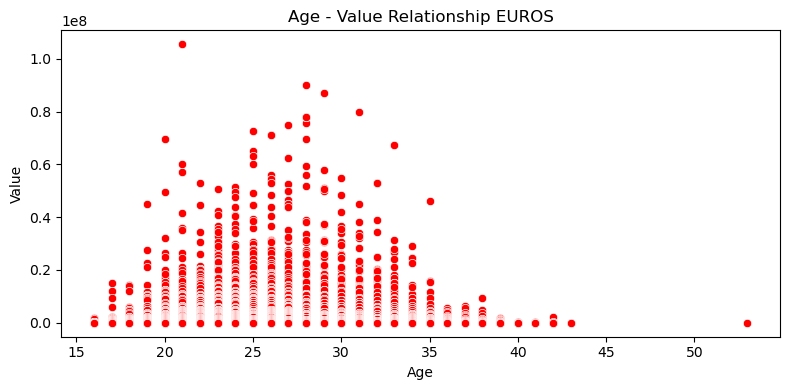

In [49]:
# Understand the relationship between player age, value, and potential.

# Do younger players tend to have higher potential or market value?
age_value = df_main[['age', 'value_eur']]

plt.figure(figsize=(8,4))

sns.scatterplot(y=age_value['value_eur'], x=age_value['age'], color='red')
plt.title('Age - Value Relationship EUROS')
plt.xlabel('Age')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

##### Scatter Plot:
1. <b>Younger players (around 20-25):</b> These players tend to cluster at higher values, indicating that younger players generally have more market value.
2. <b>Older players (30+):</b> As age increases, the market value decreases, with very few players above the age of 30 having extremely high market values.

### Task 4: Advanced Insights and Trend Analysis

##### 1. Analyzing Player Growth Potential:

In [50]:
# Understand which players have the greatest potential growth (difference between potential and overall).

df_main['potential_growth'] = df_main['potential'] - df_main['overall']

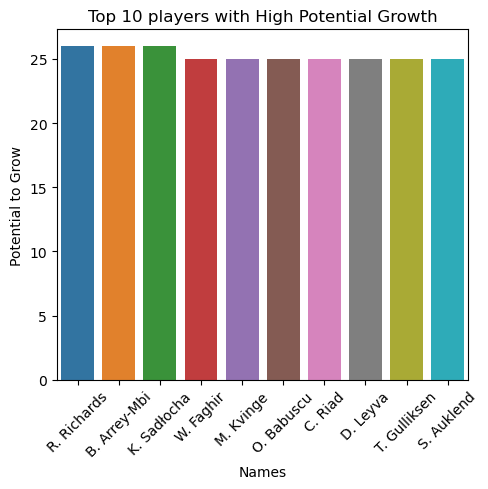

In [51]:
# Sort values by 'potential_growth' and display 'potential_growth' and 'short_name'
high_player_potential = df_main.sort_values(by='potential_growth', ascending=False)[['potential_growth', 'short_name']].head(10) # You can also use slice [:10]


plt.figure(figsize=(5,5))

sns.barplot(data=high_player_potential.head(10), x='short_name', y='potential_growth')
plt.title('Top 10 players with High Potential Growth')
plt.xlabel('Names')
plt.ylabel('Potential to Grow')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Bar Chart for Potential Growth Analysis:
1. Richards, Arrey-Mbi, Sadlocha has highest potential to grow by 26.
2. Rest of the players are quite high as well with 25 on the bar chart.

In [52]:
# Analyzing the positions and attributes of these top players.

high_player_potential = df_main.sort_values(by='potential_growth', ascending=False)[['potential_growth', 'short_name', 'pace', 'shooting', 'passing', 'dribbling', 'defending' ]].head(10) # You can also use slice [:10]

high_player_potential.head(10)


,potential_growth,short_name,pace,shooting,passing,dribbling,defending
17807,26,R. Richards,68.0,45.0,50.0,59.0,26.0
14689,26,B. Arrey-Mbi,68.0,29.0,45.0,54.0,58.0
18691,26,K. Sadłocha,72.0,49.0,37.0,50.0,19.0
17096,25,W. Faghir,65.0,58.0,38.0,54.0,21.0
18818,25,M. Kvinge,56.0,51.0,39.0,48.0,18.0
16076,25,O. Babuscu,69.0,56.0,58.0,65.0,22.0
15464,25,C. Riad,58.0,31.0,45.0,41.0,60.0
17095,25,D. Leyva,59.0,58.0,51.0,55.0,46.0
18511,25,T. Gulliksen,62.0,39.0,51.0,51.0,42.0
18057,25,S. Auklend,64.0,46.0,50.0,60.0,33.0


#### 2. Age vs. Performance:

In [62]:
# Explore how player performance (overall and potential) varies across different age groups.

# Divide players into different age groups (e.g., 18-22, 23-26, 27-30, 31+).
bins = [15, 23, 31, 39, 47, 55]
labels = ['15-23', '24-31', '32-39', '40-47', '48-55'] 

df_main['age_group'] = pd.cut(df_main['age'], bins=bins, labels=labels)

df_main[['age', 'age_group']].head()

,age,age_group
0,33,32-39
1,35,32-39
2,27,24-31
3,31,24-31
4,28,24-31


In [68]:
# Calculate the average overall, potential, and value_eur for each age group.
average_att = df_main.groupby('age_group')[['overall', 'potential', 'value_eur']].mean()
average_att.head()

,overall,potential,value_eur
age_group,,,
15-23,61.814378,72.898057,1.441679e+06
24-31,68.130591,69.969855,2.972800e+06
32-39,69.298954,69.298954,1.841539e+06
40-47,66.629630,66.629630,1.509259e+05
48-55,59.000000,59.000000,0.000000e+00


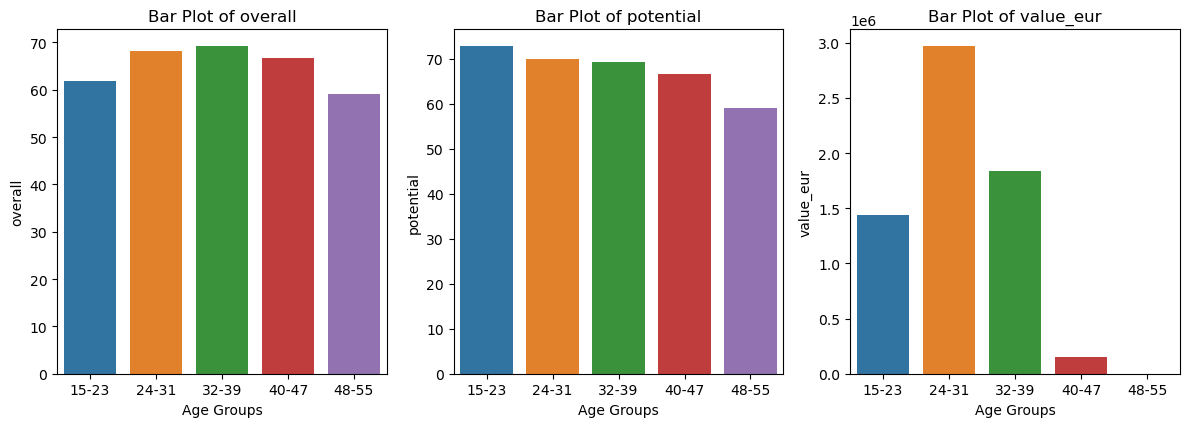

In [78]:
# Create bar plots to visualize how player performance changes with age.

plt.figure(figsize=(12,12))

for index, column in enumerate(average_att.columns, start=1):
    plt.subplot(3,3, index)
    sns.barplot(x=average_att.index, y=average_att[column])
    plt.title(f'Bar Plot of {column}')
    plt.xlabel('Age Groups')
    plt.ylabel(f'{column}')
    
plt.tight_layout()
plt.show()


#### Bar Plot:
<b>Overall Performance: </b> 

1. Players in the 24-31 and 32-39 age groups tend to have the highest overall ratings, which suggests that players are generally at their peak performance during these years.  
2. ounger players (15-23) have lower overall ratings on average, which is expected as they are still developing their skills. 
3. The overall ratings decline slightly after the age of 40, which indicates a decrease in performance as players grow older. 

<b>Potential:  </b>

1. Interestingly, the 15-23 age group has the highest potential, which aligns with the expectation that younger players have more room to grow and develop their skills.  
2. The potential for players in older age groups tends to decrease, indicating that these players have already reached or 3. are nearing the peak of their careers.  

<b>Market Value (value_eur):</b>

1. Players in the 24-31 age group hold the highest market value, followed by the 32-39 age group, which suggests that these players are at their most valuable during their peak performance years.  
2. Players aged 15-23 also have relatively high market value due to their potential, despite their lower overall performance. 
3. There is a significant drop in market value for players aged 40 and above, as teams are less likely to invest in players whose careers are nearing their end.  

#### 3. Market Value Trend by Position:

In [ ]:
# Explore the trend of player value_eur across different positions.
